# load and clean data

In [1]:
## DATA PREPROCESSING with larger and more specific stop_list
# Importing modules
import pandas as pd
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

stop_list = nltk.corpus.stopwords.words('english')
# The following list is to further remove some frequent words 
# stop_list += ['would', 'said', 'say', 'year', 'day', 'also', 'first', 'last', 'one', 'two', 'told',
#               'three', 'since', 'nft', 'metaverse','fashion','amp', 
#               'project','nfts', 'eyesoffashion', "im", "u", "even", "shes", "id", "thing", "still", "one","things",
#                "going","ive","got","get","around","else", "back","go","always"]
stop_list += ["thank","do","doing","does","good", "thankyou", "thanks", "get","gets","getting","cool","check","follow",
             "drop","drops","dropping","comment", "also", "great", "go","going","goes", "let", "really",
              "much","well","use",
             'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

def clean_post(reddit):
    if type(reddit) == float:
        return ""
    
    temp = reddit.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_list]
    #temp = [stemmer.stem(w) for w in temp]
    temp = " ".join(word for word in temp)
    return temp

In [2]:
reddit_rows_csv = pd.read_csv('merged_clean.csv', lineterminator='\n')
reddit_rows_csv

,subreddit,id,submission,p or c,Processed\r
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list\r
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment,check running mostly single mint nfts\r
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post,free cool cats solana nft everyone worth 30 00...
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment,additional details guarantee win make sure fol...
87472,SolanaNFTs,se2vdl,se2vdl,post,claim free nifty records nft joining discord\r
87473,SolanaNFTs,r8n97m,r8n97m,post,3 free nft giveaway upvote drop address\r


In [3]:
reddit_rows_csv = pd.read_csv('merged_clean.csv', lineterminator='\n')
reddit_text_list = reddit_rows_csv["Processed\r"].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_post(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
results = reddit_results_df[reddit_results_df.Processed != '']
# print('done')

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

reddit_results_df

KeyboardInterrupt: 

In [ ]:
pd.set_option("display.max_rows", None)
reddit_results_df["Processed"].value_counts()

In [ ]:
results = pd.concat([reddit_rows_csv[["subreddit","id","submission","p or c\r"]],reddit_results_df],axis=1)
#merged4.to_csv("merged_cropped_processed_topicmodelling.csv",index= False)
results

In [ ]:
# results_to_lemm = results["Processed"].tolist()
# results_to_lemm

In [ ]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

In [ ]:
# reddit_results_lemmed = pd.DataFrame()

# for x in range(len(results_to_lemm)):
# #     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
#     dict = {'Lemmed': lemmatization(results_to_lemm[x],allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])}
#     reddit_results_lemmed = reddit_results_lemmed.append(dict, ignore_index = True)
# # reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
# reddit_results_lemmed

In [4]:
#results.to_csv("merged_clean_tm.csv",index= False)


In [5]:
results = pd.read_csv('merged_clean_tm.csv', lineterminator='\n')

In [6]:
r_list = results.values.tolist()
for i in r_list:
    i[3]=i[3].rstrip("\r")
    i[4]=i[4].rstrip("\r")
results = pd.DataFrame(r_list, columns = ['subreddit', 'id', 'submission', 'p or c', 'Processed'])
results

,subreddit,id,submission,p or c,Processed
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze working nft marke...
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder working expanding platform full...
4,CardanoNFTs,gw0807w,mnko80,comment,running mostly single mint nfts
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post,free cats solana nft everyone worth 30 000 upv...
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment,additional details guarantee win make sure ste...
87472,SolanaNFTs,se2vdl,se2vdl,post,claim free nifty records nft joining discord
87473,SolanaNFTs,r8n97m,r8n97m,post,3 free nft giveaway upvote address


In [65]:
results_spa = pd.read_csv('merged_clean_spa.csv', lineterminator='\n')
r_list = results_spa.values.tolist()
for i in r_list:
    i[4]=i[4].rstrip("\r")
    i[5]=i[5].rstrip("\r")
results_spa = pd.DataFrame(r_list, columns = ['subreddit', 'id', 'submission', 'p or c', 'Processed',"author"])
results_spa


,subreddit,id,submission,p or c,Processed,author
0,CardanoNFTs,mnko80,mnko80,post,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...,TYLRwithspaces
1,CardanoNFTs,gtyvi7w,mnko80,comment,im one co founders nft craze also working nft marketplace nft backed defi goal enable artists easily launch entire collection wish also working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft gets transferred lender youd like see find us well soon launch presale first collection acting funding round build described youd like see happen p...,Optimal-Role7498
2,CardanoNFTs,hb9geeo,mnko80,comment,needs tokhun io list,diarpiiiii
3,CardanoNFTs,gy8awd2,mnko80,comment,hey im founder also working expanding platform full blown decentralized marketplace,Padierfind
4,CardanoNFTs,gw0807w,mnko80,comment,check running mostly single mint nfts,Cryptogonewild420
...,...,...,...,...,...,...
74230,opensea,hpuu95t,rnjyr6,comment,upvoted thanks,Ok_Sector_6091
74231,opensea,hpvbcx4,rnjyr6,comment,merry christmas,JIQQ5
74232,opensea,hpvg688,rnjyr6,comment,discord principedeserto merry christmas,Principedeserto
74233,opensea,hptcxdj,rnjyr6,comment,think opportunity always potential projects im referencing archethic new layer 1 blockchain,EarnestHeerlein


In [66]:
reddit_text_list = results_spa["Processed"].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_post(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
results = reddit_results_df[reddit_results_df.Processed != '']
# print('done')

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

reddit_results_df


,Processed
0,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...
1,im one co founders nft craze working nft marketplace nft backed defi goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft transferred lender youd like see find us soon launch presale first collection acting funding round build described youd like see happen please help us spread...
2,needs tokhun io list
3,hey im founder working expanding platform full blown decentralized marketplace
4,running mostly single mint nfts
...,...
74230,upvoted
74231,merry christmas
74232,discord principedeserto merry christmas
74233,think opportunity always potential projects im referencing archethic new layer 1 blockchain


In [67]:
results = pd.concat([results_spa[["subreddit","id","submission","p or c", "author"]],reddit_results_df],axis=1)
#merged4.to_csv("merged_cropped_processed_topicmodelling.csv",index= False)
results

,subreddit,id,submission,p or c,author,Processed
0,CardanoNFTs,mnko80,mnko80,post,TYLRwithspaces,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...
1,CardanoNFTs,gtyvi7w,mnko80,comment,Optimal-Role7498,im one co founders nft craze working nft marketplace nft backed defi goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft transferred lender youd like see find us soon launch presale first collection acting funding round build described youd like see happen please help us spread...
2,CardanoNFTs,hb9geeo,mnko80,comment,diarpiiiii,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment,Padierfind,hey im founder working expanding platform full blown decentralized marketplace
4,CardanoNFTs,gw0807w,mnko80,comment,Cryptogonewild420,running mostly single mint nfts
...,...,...,...,...,...,...
74230,opensea,hpuu95t,rnjyr6,comment,Ok_Sector_6091,upvoted
74231,opensea,hpvbcx4,rnjyr6,comment,JIQQ5,merry christmas
74232,opensea,hpvg688,rnjyr6,comment,Principedeserto,discord principedeserto merry christmas
74233,opensea,hptcxdj,rnjyr6,comment,EarnestHeerlein,think opportunity always potential projects im referencing archethic new layer 1 blockchain


In [68]:
# test = results[results["id"]=="hnlql8i"]["Processed"]
# print(test[48459])

In [69]:
# test2 = results[results["Processed"]=="submission r nft join us live discussion everything nfts share buy sell nfts featured bot action performed automatically please message compose r nft questions concerns"]
# test2

In [70]:
# test3 = results[results["id"]=="gwh7xnr"]["Processed"]
# print(test3[63799])

In [71]:
from nltk import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

tokenizer = RegexpTokenizer(r'\w+')
porter_stemmer = PorterStemmer()

reddit_words = []
for reddit_text in results['Processed']:
    tokens = tokenizer.tokenize(reddit_text)
    reddit_words.append(tokens)

print(len(reddit_words))

reddit_stemmed = []
for tokenized in reddit_words:
    temp = []
    for w in tokenized:
        temp.append(porter_stemmer.stem(w))
    
    reddit_stemmed.append(temp)
    
print(len(reddit_stemmed))

74235
74235


# LDA topic modelling 2

In [72]:
# !pip3 install pyLDAvis

In [73]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import pyLDAvis.gensim_models as gensimvis

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [74]:
gensim.__version__

'4.1.2'

# Reddit Data

In [75]:
# Build the bigram and trigram models
reddit_bigram = gensim.models.Phrases(reddit_words, min_count=5, threshold=100) # higher threshold fewer phrases.
reddit_trigram = gensim.models.Phrases(reddit_bigram[reddit_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
reddit_bigram_mod = gensim.models.phrases.Phraser(reddit_bigram)
reddit_trigram_mod = gensim.models.phrases.Phraser(reddit_trigram)

# See trigram example
print(reddit_trigram_mod[reddit_bigram_mod[reddit_words[0]]])

['cardano', 'nft', 'marketplace', 'projects', 'updated', '2', '9', '2022added', 'genesis', 'house', 'nftjam', 'artano', 'curated', 'marketplace', 'community', 'curated', 'high_quality', 'nft', 'marketplace', 'cardano', 'cares', 'sustainability', 'inclusivity', 'jpg_store', 'marketplace', 'trade', 'nfts', 'instantly', 'discover', 'artwork', 'explore', 'communities', 'support', 'artists', 'cardano', 'cnft_io', 'marketplace', 'digital', 'cardano', 'nft', 'token', 'platform', 'lovada', 'marketplace', 'inclusive', 'marketplace', 'cardano', 'blockchain', 'wholly', 'benefitting', 'supporting', 'artist', 'democratizing', 'art', 'market', 'genesis', 'house', 'marketplace', 'ada', 'nft', 'marketplace', 'backs', 'creators', 'genesis', 'house', 'marketplace', 'ada', 'nft', 'marketplace', 'backs', 'creators', 'nft', 'craze', 'goal', 'enable', 'artists', 'easily', 'launch', 'entire', 'collection', 'wish', 'working', 'using', 'smart_contracts', 'implement', 'shared', 'partial', 'ownership', 'nfts', '

In [76]:
def make_bigrams(texts):
    return [reddit_bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [reddit_trigram_mod[reddit_bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_list] for doc in texts_out]    
    return texts_out

In [77]:
# Form Bigrams
reddit_bigrams = make_bigrams(reddit_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
reddit_lemmatized = lemmatization(reddit_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(reddit_lemmatized[:1])

[['project', 'update', 'adde', 'genesis', 'curate', 'marketplace', 'community', 'curate', 'high_quality', 'care', 'jpg_store', 'marketplace', 'trade', 'nft', 'instantly', 'discover', 'artwork', 'explore', 'community', 'support', 'artist', 'token', 'platform', 'marketplace', 'wholly', 'benefit', 'support', 'artist', 'democratize', 'art', 'market', 'genesis', 'marketplace', 'back', 'creator', 'genesis', 'marketplace', 'back', 'creator', 'craze', 'goal', 'enable', 'artist', 'easily', 'launch', 'entire', 'collection', 'wish', 'work', 'smart_contract', 'implement', 'share', 'partial', 'ownership', 'nft', 'decentralise', 'loan', 'nft', 'dao', 'marketplace', 'unstoppable', 'self', 'organize', 'collective', 'building', 'rapid', 'dao', 'somint', 'marketplace', 'art', 'fresh', 'approach', 'passion', 'come', 'first', 'art', 'marketplace']]


In [78]:
# Create Dictionary
reddit_id2word = corpora.Dictionary(reddit_lemmatized)

# Create Corpus
reddit_texts = reddit_lemmatized

# Term Document Frequency
reddit_corpus = [reddit_id2word.doc2bow(text) for text in reddit_texts]

# View
print(reddit_corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 3), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 2), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 8), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]]


In [79]:
#human readable version of corpus
[[(reddit_id2word[id], freq) for id, freq in cp] for cp in reddit_corpus[:1]]

[[('adde', 1),
  ('approach', 1),
  ('art', 3),
  ('artist', 3),
  ('artwork', 1),
  ('back', 2),
  ('benefit', 1),
  ('building', 1),
  ('care', 1),
  ('collection', 1),
  ('collective', 1),
  ('come', 1),
  ('community', 2),
  ('craze', 1),
  ('creator', 2),
  ('curate', 2),
  ('dao', 2),
  ('decentralise', 1),
  ('democratize', 1),
  ('discover', 1),
  ('easily', 1),
  ('enable', 1),
  ('entire', 1),
  ('explore', 1),
  ('first', 1),
  ('fresh', 1),
  ('genesis', 3),
  ('goal', 1),
  ('high_quality', 1),
  ('implement', 1),
  ('instantly', 1),
  ('jpg_store', 1),
  ('launch', 1),
  ('loan', 1),
  ('market', 1),
  ('marketplace', 8),
  ('nft', 3),
  ('organize', 1),
  ('ownership', 1),
  ('partial', 1),
  ('passion', 1),
  ('platform', 1),
  ('project', 1),
  ('rapid', 1),
  ('self', 1),
  ('share', 1),
  ('smart_contract', 1),
  ('somint', 1),
  ('support', 2),
  ('token', 1),
  ('trade', 1),
  ('unstoppable', 1),
  ('update', 1),
  ('wholly', 1),
  ('wish', 1),
  ('work', 1)]]

# reddit LDA topics

In [80]:
from imp import reload

In [81]:
reddit_topics = []
reddit_perplexity_score = []
reddit_coherence_score = []
reddit_vis = []
reddit_lda_model_list = []

for i in range(3,6):
    reddit_lda_model = gensim.models.ldamodel.LdaModel(corpus=reddit_corpus,
                                           id2word=reddit_id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    print(type(reddit_lda_model))
    reddit_topics.append(reddit_lda_model.show_topics(num_topics=i,num_words=30))
    
    reddit_perplexity_score.append(reddit_lda_model.log_perplexity(reddit_corpus))
    print('\nPerplexity: ', reddit_perplexity_score[i-3])  # a measure of how good the model is. lower the better.
    
    coherence_model_lda = CoherenceModel(model=reddit_lda_model, texts=reddit_lemmatized, dictionary=reddit_id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    reddit_coherence_score.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)
    
    pyLDAvis.enable_notebook()
    vis_i = pyLDAvis.gensim_models.prepare(reddit_lda_model, reddit_corpus, reddit_id2word)
    reddit_vis.append(vis_i)
    reddit_lda_model_list.append(reddit_lda_model)
    
print(type(reddit_lda_model_list[0]))

<class 'gensim.models.ldamodel.LdaModel'>

Perplexity:  -8.493948630137004

Coherence Score:  0.4393547570511787
<class 'gensim.models.ldamodel.LdaModel'>

Perplexity:  -8.614481442159764

Coherence Score:  0.4524855145462813
<class 'gensim.models.ldamodel.LdaModel'>

Perplexity:  -8.693378398393717

Coherence Score:  0.44447878309386424
<class 'gensim.models.ldamodel.LdaModel'>


In [82]:
reddit_topics

[[(0,
   '0.118*"discord" + 0.077*"join" + 0.046*"project" + 0.045*"giveaway" + 0.035*"link" + 0.034*"twitter" + 0.025*"nft" + 0.025*"opensea" + 0.021*"easy" + 0.017*"want" + 0.016*"welcome_epic" + 0.015*"eth" + 0.012*"new" + 0.012*"send" + 0.012*"give" + 0.009*"opportunity" + 0.009*"sexy" + 0.009*"post" + 0.008*"upvote" + 0.007*"think" + 0.006*"sell" + 0.006*"happy" + 0.005*"interesting" + 0.005*"big" + 0.005*"buy" + 0.005*"time" + 0.005*"share" + 0.005*"year" + 0.005*"helps_lot" + 0.004*"already"'),
  (1,
   '0.049*"wallet" + 0.037*"address" + 0.029*"collection" + 0.023*"mint" + 0.018*"dope" + 0.017*"free" + 0.013*"win" + 0.013*"vote" + 0.012*"first" + 0.011*"super" + 0.011*"receive" + 0.010*"community" + 0.009*"name" + 0.009*"blockchain" + 0.009*"game" + 0.009*"add" + 0.008*"crypto" + 0.008*"claim" + 0.007*"unique" + 0.007*"need" + 0.007*"ready" + 0.007*"website" + 0.007*"stake" + 0.007*"earn" + 0.006*"future" + 0.006*"able" + 0.005*"layer" + 0.005*"gif" + 0.005*"upcoming" + 0.005*"

ValueError: x and y must have same first dimension, but have shapes (2,) and (3,)

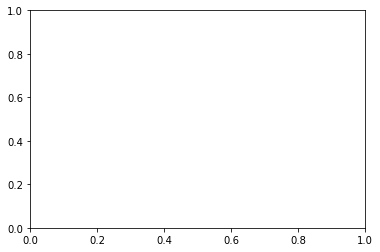

In [83]:
import matplotlib.pyplot as plt

limit=2+len(reddit_perplexity_score); start=3; step=1;
x = range(start, limit, step)
plt.plot(x, reddit_perplexity_score,label='perplexity')
plt.xlabel("Num Topics")
plt.ylabel("perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [ ]:
# MEDIA COHERENCE SCORE 
limit=2+len(reddit_coherence_score); start=3; step=1;
x = range(start, limit, step)
plt.plot(x, reddit_coherence_score,label='coherence')
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence"), loc='best')
plt.show()

What does perplexity and Coherance Score tell us?<br> 
- Perplexity: Calculate the held out log-likelihood
- Coherence: Calculate the conditional likelihood of co-occurrence
The perplexity metric is a predictive one. It assesses a topic model’s ability to predict a test set after having been trained on a training set. But does not tell us if its coherant. As the perplexity score improves (ie. the held out log-likelihood is higher), the human interpretability of topics get worse (rather than better).<br>



In [98]:
reddit_vis[0]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.287494  0.123970       1        1  34.044366
1      0.032044 -0.301283       2        1  33.344486
2      0.255450  0.177313       3        1  32.611148, topic_info=          Term          Freq         Total Category  logprob  loglift
141    discord  17965.000000  17965.000000  Default  30.0000  30.0000
145       join  11653.000000  11653.000000  Default  29.0000  29.0000
126       love   8283.000000   8283.000000  Default  28.0000  28.0000
2          art   7751.000000   7751.000000  Default  27.0000  27.0000
354     wallet   7281.000000   7281.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
54        wish    672.294178    673.908207   Topic3  -5.3774   1.1181
422       take    682.931471    684.595739   Topic3  -5.3617   1.1181
705    concept    762.422142    764.693192   Topic3  -5.2516   1.1175
1729  username   1032.168624   1046.233806   Topic3  -4.9487   1.1070
330       sexy   1662.597530   3100.945977   Topic3  -4.4720   0.4972

[133 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
102       1  0.001134  able
102       2  0.997842  able
102       3  0.001134  able
103       1  0.000763   add
103       2  0.998905   add
...     ...       ...   ...
55        2  0.000214  work
55        3  0.999693  work
652       1  0.997919  year
652       2  0.001380  year
652       3  0.001380  year

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [85]:
for i in range(len(reddit_vis)):
    name = "reddit_lda_spa"+str(i)+".html"
    pyLDAvis.save_html(reddit_vis[i],name)

In [86]:
topic_1 = []
topic_1_string = ''

topic_2 = []
topic_2_string = ''

topic_3 = []
topic_3_string = ''

check1 = reddit_topics[0][0][1].split("\"")
check1 = [s.rstrip("*").lstrip(" + ") for s in check1]

check2 = reddit_topics[0][1][1].split("\"")
check2 = [s.rstrip("*").lstrip(" + ") for s in check2]

check3 = reddit_topics[0][2][1].split("\"")
check3 = [s.rstrip("*").lstrip(" + ") for s in check3]

In [87]:
check2

['0.049',
 'wallet',
 '0.037',
 'address',
 '0.029',
 'collection',
 '0.023',
 'mint',
 '0.018',
 'dope',
 '0.017',
 'free',
 '0.013',
 'win',
 '0.013',
 'vote',
 '0.012',
 'first',
 '0.011',
 'super',
 '0.011',
 'receive',
 '0.010',
 'community',
 '0.009',
 'name',
 '0.009',
 'blockchain',
 '0.009',
 'game',
 '0.009',
 'add',
 '0.008',
 'crypto',
 '0.008',
 'claim',
 '0.007',
 'unique',
 '0.007',
 'need',
 '0.007',
 'ready',
 '0.007',
 'website',
 '0.007',
 'stake',
 '0.007',
 'earn',
 '0.006',
 'future',
 '0.006',
 'able',
 '0.005',
 'layer',
 '0.005',
 'gif',
 '0.005',
 'upcoming',
 '0.005',
 'metaverse',
 '']

In [88]:
for i in range(30):
    topic_1.append((check1[(i*2)+1],check1[i*2]))
    topic_1_string += check1[(i*2)+1]
    topic_1_string += " "
    
    topic_2.append((check2[(i*2)+1],check2[i*2]))
    topic_2_string += check2[(i*2)+1]
    topic_2_string += " "
    
    topic_3.append((check3[(i*2)+1],check3[i*2]))
    topic_3_string += check3[(i*2)+1]
    topic_3_string += " "

In [89]:
print("Topic 1: ",topic_1_string)
print(" ")
print("Topic 2: ",topic_2_string)
print(" ")
print("Topic 3: ",topic_3_string)
print(" ")

Topic 1:  discord join project giveaway link twitter nft opensea easy want welcome_epic eth new send give opportunity sexy post upvote think sell happy interesting big buy time share year helps_lot already 
 
Topic 2:  wallet address collection mint dope free win vote first super receive community name blockchain game add crypto claim unique need ready website stake earn future able layer gif upcoming metaverse 
 
Topic 3:  love art nice look work awesome luck amazing upvoted hope like sexy beautiful guy come piece artwork make see keep help username sick support favorite design thx lot know concept 
 


In [90]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(reddit_lda_model_list[0], reddit_corpus, reddit_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.6756,"wallet, address, collection, mint, dope, free, win, vote, first, super","[project, update, adde, genesis, curate, marketplace, community, curate, high_quality, care, jpg_store, marketplace, trade, nft, instantly, discover, artwork, explore, community, support, artist, token, platform, marketplace, wholly, benefit, support, artist, democratize, art, market, genesis, marketplace, back, creator, genesis, marketplace, back, creator, craze, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, ..."
1,1,1.0,0.6767,"wallet, address, collection, mint, dope, free, win, vote, first, super","[co, founder, craze, work, back, defi, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, decentralise, loan, nft, collateral, allow, user, earn, high, lending, loan, interest, pay, deadline, ownership, full, partial, transfer, lender, see, find, soon, launch, presale, first, act, funding, round, build, describe, see, happen, help, participate, collection, launch, week]"
2,2,1.0,0.4058,"wallet, address, collection, mint, dope, free, win, vote, first, super","[need, tokhun_io, list]"
3,3,1.0,0.4992,"wallet, address, collection, mint, dope, free, win, vote, first, super","[founder, work, expand, platform, full, blow, decentralized, marketplace]"
4,4,1.0,0.3888,"wallet, address, collection, mint, dope, free, win, vote, first, super","[run, mostly, single, mint, nft]"
5,5,1.0,0.5205,"wallet, address, collection, mint, dope, free, win, vote, first, super","[gamifie, allow, human, collect, trade, audiobook, gamifie, way, credit_card]"
6,6,2.0,0.4336,"love, art, nice, look, work, awesome, luck, amazing, upvoted, hope","[like, mint, digital, art]"
7,7,1.0,0.6568,"wallet, address, collection, mint, dope, free, win, vote, first, super","[add, beta, artist, able, list, sale, open, public, listing, th, feature, plan]"
8,8,0.0,0.5886,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[somint, twitter, link, point, reddit]"
9,9,1.0,0.4980,"wallet, address, collection, mint, dope, free, win, vote, first, super","[digital, trading_card, metaverse, asset, live, week]"


In [91]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.6756,"wallet, address, collection, mint, dope, free, win, vote, first, super","[project, update, adde, genesis, curate, marketplace, community, curate, high_quality, care, jpg_store, marketplace, trade, nft, instantly, discover, artwork, explore, community, support, artist, token, platform, marketplace, wholly, benefit, support, artist, democratize, art, market, genesis, marketplace, back, creator, genesis, marketplace, back, creator, craze, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, ..."
1,1,1.0,0.6767,"wallet, address, collection, mint, dope, free, win, vote, first, super","[co, founder, craze, work, back, defi, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, decentralise, loan, nft, collateral, allow, user, earn, high, lending, loan, interest, pay, deadline, ownership, full, partial, transfer, lender, see, find, soon, launch, presale, first, act, funding, round, build, describe, see, happen, help, participate, collection, launch, week]"
2,2,1.0,0.4058,"wallet, address, collection, mint, dope, free, win, vote, first, super","[need, tokhun_io, list]"
3,3,1.0,0.4992,"wallet, address, collection, mint, dope, free, win, vote, first, super","[founder, work, expand, platform, full, blow, decentralized, marketplace]"
4,4,1.0,0.3888,"wallet, address, collection, mint, dope, free, win, vote, first, super","[run, mostly, single, mint, nft]"
...,...,...,...,...,...
74230,74230,2.0,0.3975,"love, art, nice, look, work, awesome, luck, amazing, upvoted, hope",[]
74231,74231,2.0,0.4679,"love, art, nice, look, work, awesome, luck, amazing, upvoted, hope",[merry_christma]
74232,74232,0.0,0.4183,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[discord, principedeserto, merry_christma]"
74233,74233,0.0,0.4021,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[think, opportunity, always, potential, project, reference, archethic, new, layer, blockchain]"


In [92]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 500

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
1,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
2,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
3,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
4,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
5,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
6,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
7,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
8,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"
9,0.0,0.7575,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[submission, nft, join, live_discussion, nft, share, buy, sell, nft, bot_action, please_message, compose]"


In [93]:
avada_kedavra = pd.concat([results,df_dominant_topic], axis=1)
avada_kedavra

,subreddit,id,submission,p or c,author,Processed,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,CardanoNFTs,mnko80,mnko80,post,TYLRwithspaces,cardano nft marketplace projects updated 2 9 2022added genesis house nftjam artano curated marketplace community curated high quality nft marketplace cardano cares sustainability inclusivity jpg store marketplace trade nfts instantly discover artwork explore communities support artists cardano cnft io marketplace digital cardano nft token platform lovada marketplace inclusive marketplace cardano blockchain wholly benefitting supporting artist democratizing art market genesis house marketplac...,0,1.0,0.6756,"wallet, address, collection, mint, dope, free, win, vote, first, super","[project, update, adde, genesis, curate, marketplace, community, curate, high_quality, care, jpg_store, marketplace, trade, nft, instantly, discover, artwork, explore, community, support, artist, token, platform, marketplace, wholly, benefit, support, artist, democratize, art, market, genesis, marketplace, back, creator, genesis, marketplace, back, creator, craze, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, ..."
1,CardanoNFTs,gtyvi7w,mnko80,comment,Optimal-Role7498,im one co founders nft craze working nft marketplace nft backed defi goal enable artists easily launch entire collection wish working using smart contracts implement shared partial ownership nfts decentralised p2p loans using nfts collateral would allow users earn higher apy lending loan interest paid deadline ownership full partial nft transferred lender youd like see find us soon launch presale first collection acting funding round build described youd like see happen please help us spread...,1,1.0,0.6767,"wallet, address, collection, mint, dope, free, win, vote, first, super","[co, founder, craze, work, back, defi, goal, enable, artist, easily, launch, entire, collection, wish, work, smart_contract, implement, share, partial, ownership, nft, decentralise, loan, nft, collateral, allow, user, earn, high, lending, loan, interest, pay, deadline, ownership, full, partial, transfer, lender, see, find, soon, launch, presale, first, act, funding, round, build, describe, see, happen, help, participate, collection, launch, week]"
2,CardanoNFTs,hb9geeo,mnko80,comment,diarpiiiii,needs tokhun io list,2,1.0,0.4058,"wallet, address, collection, mint, dope, free, win, vote, first, super","[need, tokhun_io, list]"
3,CardanoNFTs,gy8awd2,mnko80,comment,Padierfind,hey im founder working expanding platform full blown decentralized marketplace,3,1.0,0.4992,"wallet, address, collection, mint, dope, free, win, vote, first, super","[founder, work, expand, platform, full, blow, decentralized, marketplace]"
4,CardanoNFTs,gw0807w,mnko80,comment,Cryptogonewild420,running mostly single mint nfts,4,1.0,0.3888,"wallet, address, collection, mint, dope, free, win, vote, first, super","[run, mostly, single, mint, nft]"
...,...,...,...,...,...,...,...,...,...,...,...
74230,opensea,hpuu95t,rnjyr6,comment,Ok_Sector_6091,upvoted,74230,2.0,0.3975,"love, art, nice, look, work, awesome, luck, amazing, upvoted, hope",[]
74231,opensea,hpvbcx4,rnjyr6,comment,JIQQ5,merry christmas,74231,2.0,0.4679,"love, art, nice, look, work, awesome, luck, amazing, upvoted, hope",[merry_christma]
74232,opensea,hpvg688,rnjyr6,comment,Principedeserto,discord principedeserto merry christmas,74232,0.0,0.4183,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[discord, principedeserto, merry_christma]"
74233,opensea,hptcxdj,rnjyr6,comment,EarnestHeerlein,think opportunity always potential projects im referencing archethic new layer 1 blockchain,74233,0.0,0.4021,"discord, join, project, giveaway, link, twitter, nft, opensea, easy, want","[think, opportunity, always, potential, project, reference, archethic, new, layer, blockchain]"


In [94]:
avada_kedavra["Dominant_Topic"].value_counts()

2.0    45765
0.0    20636
1.0     7834
Name: Dominant_Topic, dtype: int64

In [95]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 500

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = avada_kedavra.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=False).head(10)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet[["id","Dominant_Topic","Topic_Perc_Contrib","Processed","subreddit","p or c","author"]]

,id,Dominant_Topic,Topic_Perc_Contrib,Processed,subreddit,p or c,author
0,h0dj2yc,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
1,hamuxa9,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
2,he2krxe,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
3,h7tcc6h,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
4,ha63tlm,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
5,hb1iyql,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
6,hai1lqv,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
7,hbocmkn,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
8,gubtv0w,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
9,h4tmxvf,0.0,0.7575,submission nft join us live discussion everything nfts share buy sell nfts bot action performed automatically please message compose nft questions concerns,NFT,comment,AutoModerator
